# Pokémon Battle Outcome Analysis

Welcome to this Jupyter Notebook where we delve into the fascinating world of Pokémon battle outcomes. Our goal is to analyze patterns, identify top performers, and understand how different attributes contribute to a Pokémon's success in battles.

## Purpose of the Notebook

Up to this point, in the pokemon_module.py we have:

- Imported essential libraries and datasets.
- Conducted preliminary data cleaning and exploration to understand the structure and quality of our data.
- Created a Pokemon class with attributes and methods for battle.
- Created a runbattle() function to fight one pokemon against an opponent

## How to Proceed

**Important:** This notebook is designed for interactive exploration and analysis. To ensure you can tailor the analysis to your specific interests without immediately engaging in computationally expensive processes, certain blocks of code, particularly those involving extensive calculations or data processing, are commented out.

### Generating a CSV File Based on the Number of Runs

If you wish to export your analysis results to a CSV file for further examination or sharing, please follow these simple steps:

1. Locate the code block marked for CSV export. It will look something like this:

```python
# Uncomment the lines below to export the DataFrame to a CSV file based on the number of runs you've imported
# df.to_csv('your_exported_file_name.csv')
```

2. Replace 'your_exported_file_name.csv' with your desired file name, ensuring it ends in .csv.

3. Remove the # at the beginning of the line to uncomment the code. This will activate the export command.

4. Run the modified code block to generate the CSV file. It will be saved to the same directory as this notebook unless specified otherwise.

Note: To avoid accidentally starting computationally expensive processes by using the "Run All" command, make sure to re-comment the export code block after exporting your CSV file.

### Breakpoint

Further down the notebook, you will find a markdown cell with a breakpoint. After this cell, you can find our preliminary work on visualizing out findings.

## Enjoy exploring the data, and may the best Pokémon win!


In [1]:
# Import Statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import requests
from PIL import Image
from io import BytesIO
# set pandas copy on write to be true
pd.set_option("mode.copy_on_write", True)
import pokemon_module as pk

c:\Users\Hayden\Documents\NPS_local\Simulation\Pokemon_2_electric_boogaloo\pokemon_module.py:86: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  L1_moves.loc[np.where(L1_moves['move'] == 'swift')[0], ['accuracy']] = L1_moves.loc[np.where(L1_moves['move'] == 'swift')[0], ['accuracy']].replace('_',999999)


In [2]:
#Assign all pokemon as a class
gen1 = np.where(pk.Pokemon_df['generation'] == 1) #isolates gen 1 pokemon
pokemon_dict = {} #Dictionary in {Pokemon name:Pokemon class format}
for pokemon_name in pk.Pokemon_df.iloc[gen1].index: #for every pokemon in gen 1
    #assign a class as a member of the dictionary
    pokemon_dict[pokemon_name] = pk.Pokemon(pokemon_name)

In [7]:
pokemon_dict['charmander'].moveset

{'scratch': {'type': 'normal',
  'power': 40,
  'accuracy': '100',
  'pp': 35,
  'category': 'physical',
  'effect': nan,
  'effect_prob': 1.0},
 'growl': {'type': 'normal',
  'power': 0,
  'accuracy': '100',
  'pp': 40,
  'category': 'status',
  'effect': "lowers opponent's attack.",
  'effect_prob': 1.0},
 'ember': {'type': 'fire',
  'power': 40,
  'accuracy': '100',
  'pp': 25,
  'category': 'special',
  'effect': 'may burn opponent.',
  'effect_prob': 0.1},
 'leer': {'type': 'normal',
  'power': 0,
  'accuracy': '100',
  'pp': 30,
  'category': 'status',
  'effect': "lowers opponent's defense.",
  'effect_prob': 1.0},
 'rage': {'type': 'normal',
  'power': 20,
  'accuracy': '100',
  'pp': 20,
  'category': 'physical',
  'effect': "raises user's attack when hit.",
  'effect_prob': 1.0},
 'slash': {'type': 'normal',
  'power': 70,
  'accuracy': '100',
  'pp': 20,
  'category': 'physical',
  'effect': 'high critical hit ratio.',
  'effect_prob': 1.0},
 'flamethrower': {'type': 'fire',

In [4]:
# uncomment below and pick two pokemon to see a battle
pk.runbattle(pokemon_dict['bulbasaur'],pokemon_dict['charmander'],verbose=True)

charmander goes first!
charmander used flamethrower!
charmander's move hits!
  may burn opponent.
  flamethrower hit for 77.47 damage!
-- bulbasaur has 27.5 hp remaining.
bulbasaur used growl!
bulbasaur's move hits!
  lowers opponent's attack.
-- charmander has 99.0 hp remaining.
charmander used scratch!
charmander's move hits!
  scratch hit for 34.80 damage!
-- bulbasaur has -7.3 hp remaining.
charmander wins!


'charmander'

In [4]:
resultsframe = pd.DataFrame(index=pk.Pokemon_df.index, columns=pk.Pokemon_df.index)
resultsframe.fillna(value=0, inplace=True)
resultsframe

C:\Users\burge\AppData\Local\Temp\ipykernel_19564\3104834172.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  resultsframe.fillna(value=0, inplace=True)


name,bulbasaur,ivysaur,venusaur,charmander,charmeleon,charizard,squirtle,wartortle,blastoise,caterpie,...,aerodactyl,snorlax,articuno,zapdos,moltres,dratini,dragonair,dragonite,mewtwo,mew
name,,,,,,,,,,,,,,,,,,,,,
bulbasaur,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ivysaur,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
venusaur,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
charmander,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
charmeleon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dratini,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dragonair,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dragonite,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
pokemon_list = list(pokemon_dict)

In [6]:
def battlesim():
    '''Pits every pokemon against each other'''
    for i in range(len(pokemon_list)):
        for j in range(i,len(pokemon_list)):
            Pokemon = pokemon_list[i]
            other = pokemon_list[j]
            victor = pk.runbattle(pokemon_dict[Pokemon],pokemon_dict[other])
            if victor == pokemon_dict[Pokemon].name:
                resultsframe.loc[other,Pokemon]=0
                resultsframe.loc[Pokemon,other]=1
            elif victor == pokemon_dict[other].name:
                resultsframe.loc[Pokemon,other]=0
                resultsframe.loc[other,Pokemon]=1
            else:
                resultsframe.loc[Pokemon,other]=0
                resultsframe.loc[other,Pokemon]=0
    return resultsframe

In [7]:
battlesim()

name,bulbasaur,ivysaur,venusaur,charmander,charmeleon,charizard,squirtle,wartortle,blastoise,caterpie,...,aerodactyl,snorlax,articuno,zapdos,moltres,dratini,dragonair,dragonite,mewtwo,mew
name,,,,,,,,,,,,,,,,,,,,,
bulbasaur,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
ivysaur,1,0,0,1,0,1,1,1,1,1,...,0,0,0,0,0,1,1,1,0,0
venusaur,1,1,0,1,1,1,1,1,1,1,...,1,0,0,0,0,1,1,1,0,1
charmander,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
charmeleon,1,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dratini,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
dragonair,1,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
dragonite,1,0,0,1,0,1,1,1,1,1,...,0,0,0,0,0,1,1,0,0,0


In [8]:
def montepython(n):
    '''Runs battlesim() n times and adds it to one dataframe. Returns final dataframe.'''
    monte_frame = pd.DataFrame(index=pk.Pokemon_df.index, columns=pk.Pokemon_df.index)
    monte_frame.fillna(value=0, inplace=True)
    for run in range(n):
        monte_frame = monte_frame + battlesim()
    return monte_frame

In [9]:
## Uncomment below and change how many runs of the monte carlo simulation you would like.
# number_of_runs = 1000
# totalresultsframe=montepython(number_of_runs)
# totalresultsframe
# totalresultsframe.to_csv('1000runs.csv')

## Everything up until this point is needed to produce your own 1000runs.csv.

After this breakpoint is the code that we used to explore the data.


In [10]:
# Here we provide you our 1000runs.csv that was the product of the cell above.
totalresultsframe = pd.read_csv('1000runs.csv', index_col='name')
totalresultsframe

,bulbasaur,ivysaur,venusaur,charmander,charmeleon,charizard,squirtle,wartortle,blastoise,caterpie,...,aerodactyl,snorlax,articuno,zapdos,moltres,dratini,dragonair,dragonite,mewtwo,mew
name,,,,,,,,,,,,,,,,,,,,,
bulbasaur,0,467,11,583,0,0,2,0,0,363,...,0,0,0,0,0,97,3,0,0,0
ivysaur,533,0,5,1000,335,174,910,957,672,1000,...,62,91,0,0,0,999,999,999,29,0
venusaur,989,965,0,1000,712,597,1000,1000,1000,1000,...,870,126,0,136,188,1000,1000,1000,496,945
charmander,417,0,0,0,0,0,0,0,0,368,...,0,0,0,0,0,89,1,0,0,0
charmeleon,1000,624,275,1000,0,0,520,209,4,1000,...,338,1,96,0,0,951,689,616,29,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dratini,903,1,0,911,47,0,13,2,0,943,...,0,0,0,0,0,0,40,1,0,0
dragonair,997,1,0,999,305,27,378,108,0,1000,...,0,0,0,0,0,960,0,43,0,0
dragonite,1000,1,0,1000,375,241,914,685,14,1000,...,0,0,0,0,35,999,937,0,1,0


In [12]:
# copy of totalresultsframe
totalresultsframe_stats_df = totalresultsframe.copy()

# Extract diagonal entries (total battles) and add a new column
totalresultsframe_stats_df['round_total'] = (totalresultsframe_stats_df.values).max()

# Calculate the number of Pokémon
num_pokemon = len(totalresultsframe_stats_df)

# Create the 'fight_total' column
totalresultsframe_stats_df['fight_total'] = totalresultsframe_stats_df['round_total'] * (num_pokemon - 1)

# Calculate total_wins by summing each row
totalresultsframe_stats_df['total_wins'] = totalresultsframe_stats_df.sum(axis=1) - totalresultsframe_stats_df['fight_total'] - (totalresultsframe_stats_df['round_total'])

# Create the 'win_percentage' column
totalresultsframe_stats_df['win_percentage'] = 0.0  # Initialize with 0
total_wins_nonzero = totalresultsframe_stats_df['total_wins'] != 0
totalresultsframe_stats_df.loc[total_wins_nonzero, 'win_percentage'] = (totalresultsframe_stats_df['total_wins']) / totalresultsframe_stats_df['fight_total'] * 100.0

# add pokedex number and sprite image to the Dataframe
totalresultsframe_stats_df = pd.merge(totalresultsframe_stats_df,pk.Pokemon_df.loc[:, ['pokedex_number', 'image_url']], on='name', how='left')

# Rank the Pokémon by win percentage and assign the ranks to a new column called "rank"
totalresultsframe_stats_df['rank'] = totalresultsframe_stats_df['win_percentage'].rank(ascending=False, method='first')

# Count the number of moves for each Pokemon and create a dictionary
move_count_dict = pk.merged_moves_df['name'].value_counts().to_dict()

# Create a new column 'move_count' in totalresultsframe_stats_df based on the 'name' column
totalresultsframe_stats_df['move_count'] = totalresultsframe_stats_df.index.map(move_count_dict)

# Create a new column 'c' in totalresultsframe_stats_df based on the 'name' column
totalresultsframe_stats_df['move_count'] = totalresultsframe_stats_df.index.map(move_count_dict)

# Drop the 'pokedex_number' column from Pokemon_df
Pokemon_df_filtered = pk.Pokemon_df.drop(columns=['pokedex_number', 'image_url'])

# Merge totalresultsframe_stats_df with Pokemon_df_filtered
totalresultsframe_stats_df = totalresultsframe_stats_df.join(Pokemon_df_filtered)

# Show the updated DataFrame
totalresultsframe_stats_df.head()

# Display the updated DataFrame with the new column
print(totalresultsframe_stats_df)

            bulbasaur  ivysaur  venusaur  charmander  charmeleon  charizard  \
name                                                                          
bulbasaur           0      467        11         583           0          0   
ivysaur           533        0         5        1000         335        174   
venusaur          989      965         0        1000         712        597   
charmander        417        0         0           0           0          0   
charmeleon       1000      624       275        1000           0          0   
...               ...      ...       ...         ...         ...        ...   
dratini           903        1         0         911          47          0   
dragonair         997        1         0         999         305         27   
dragonite        1000        1         0        1000         375        241   
mewtwo           1000      958       430        1000         965        707   
mew              1000      999        44        1000

In [13]:
#Pokemon wins by type:
#Series for the type 1 and type 2 of Pokemon and sum of total wins:
type1 = totalresultsframe.index.to_series().apply(lambda x: pokemon_dict[x].types[1])
type2 = totalresultsframe.index.to_series().apply(lambda x: pokemon_dict[x].types[2])
sums = totalresultsframe.sum(axis=1)

#Total results copy adds columns type1, type2, Total_Wins
total_results_copy = totalresultsframe.copy()
total_results_copy.insert(0,'type1',type1)
total_results_copy.insert(1,'type2',type2)
total_results_copy.insert(2,'Total_Wins',sums)

#Pivot tables sorting by type:
#Sum wins
sum_pivot1 = total_results_copy.pivot_table(index='type1',values = 'Total_Wins',aggfunc = 'sum',fill_value=0,sort = True)
sum_pivot2 = total_results_copy.pivot_table(index='type2',values = 'Total_Wins',aggfunc = 'sum',fill_value=0,dropna=False)
sum_pivot1.rename(columns={'Total_Wins':'Type 1'},inplace=True)
sum_pivot2.rename(columns={'Total_Wins':'Type 2'},inplace=True)
#Mean of wins
mean_pivot1 = total_results_copy.pivot_table(index='type1',values = 'Total_Wins',aggfunc = 'mean',fill_value=0,sort = True)
mean_pivot2 = total_results_copy.pivot_table(index='type2',values = 'Total_Wins',aggfunc = 'mean',fill_value=0,dropna=False)
mean_pivot1.rename(columns={'Total_Wins':'Type 1'},inplace=True)
mean_pivot2.rename(columns={'Total_Wins':'Type 2'},inplace=True)

#combine pivot tables for graphing
sum_by_types = pd.concat([sum_pivot1,sum_pivot2],axis=1)
mean_by_types = pd.concat([mean_pivot1,mean_pivot2],axis=1)
sum_by_types.fillna(0,inplace=True)
mean_by_types.fillna(0,inplace=True)
sum_by_types.sort_values('Type 1',inplace=True)
mean_by_types.sort_values('Type 1',inplace=True)

<Axes: title={'center': 'Total Wins by Type'}, xlabel='Number of Wins', ylabel='Type'>

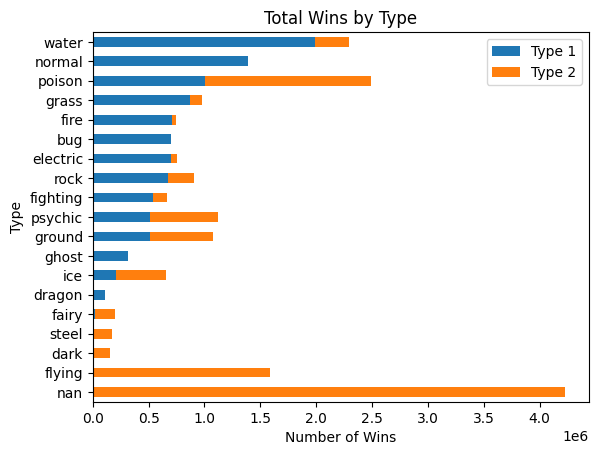

In [14]:
#Plot Total Wins by Type
sum_by_types.plot.barh(stacked=True,title="Total Wins by Type",xlabel="Number of Wins",ylabel="Type")

<Axes: title={'center': 'Average Wins by Type'}, xlabel='Number of Wins', ylabel='Type'>

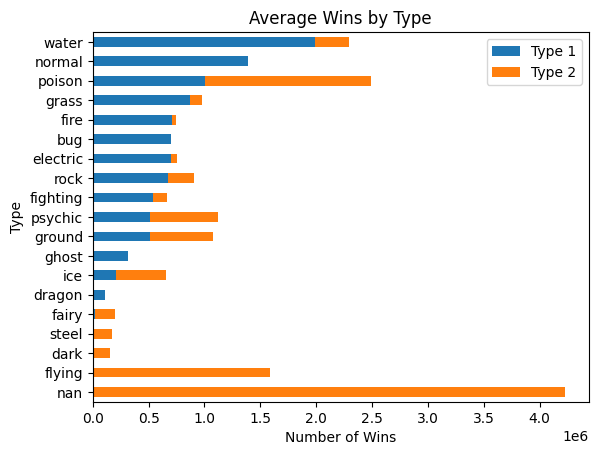

In [15]:
#Plot average wins by type
sum_by_types.plot.barh(stacked=True,title="Average Wins by Type",xlabel="Number of Wins",ylabel="Type")

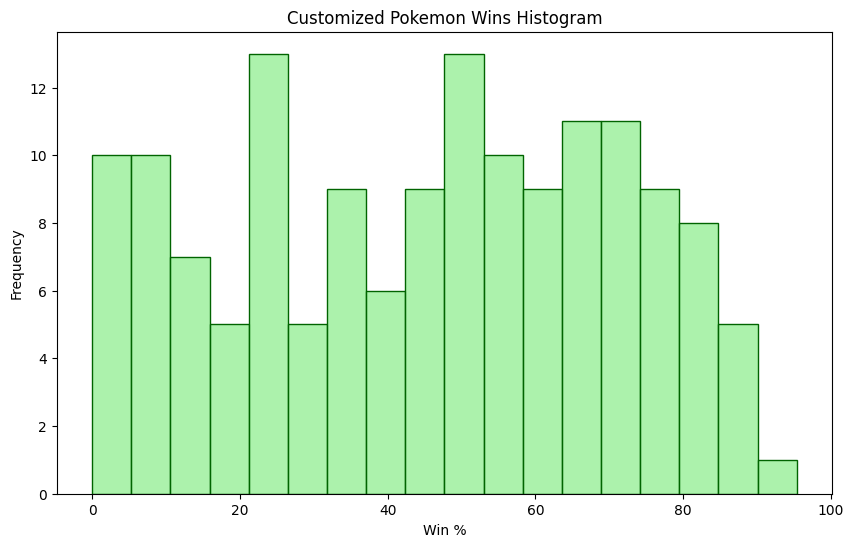

In [16]:
# histogram
plt.figure(figsize=(10, 6))
sns.histplot(totalresultsframe_stats_df['win_percentage'], bins= 18, color='lightgreen', edgecolor='darkgreen', kde=False)
plt.title('Customized Pokemon Wins Histogram')
plt.xlabel('Win %')
plt.ylabel('Frequency')

plt.show()

# The histogram reveals that a significant portion of Pokémon
# perform moderately well, with win percentages clustered around 40%.

# There are fewer Pokémon with extremely low or high-win percentages,
# which is as indicated by shorter bars towards both ends of the x-axis.

# The distribution suggests that the Pokémon are balanced in terms of win rates.
# The scarcity of Pokémon with very low or very high win percentages may be indiciative
# of all Pokemon being on Level 1


In [17]:
# Statistics for battle results
mean_value = totalresultsframe_stats_df['win_percentage'].mean()
mode_value = totalresultsframe_stats_df['win_percentage'].mode().iloc[0]
median_value = totalresultsframe_stats_df['win_percentage'].median()
std_deviation_value = totalresultsframe_stats_df['win_percentage'].std()
skewness_value = totalresultsframe_stats_df['win_percentage'].skew().round(1)

# Display the statistics
print(f"Mean: {mean_value:.1f}")
print(f"Mode: {mode_value:.1f}")
print(f"Median: {median_value:.1f}")
print(f"Standard Deviation: {std_deviation_value:.1f}")
print(f"Skewness: {skewness_value:.1f}")

Mean: 45.3
Mode: 0.0
Median: 47.9
Standard Deviation: 25.9
Skewness: -0.1


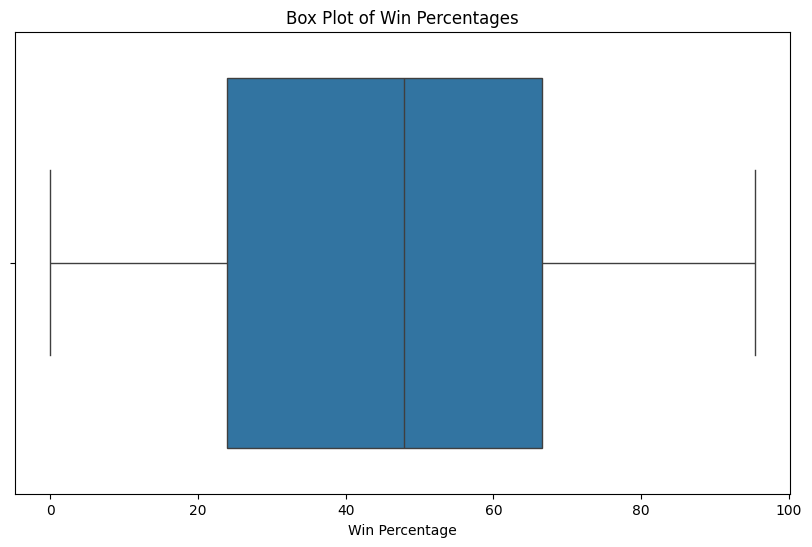

In [18]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=totalresultsframe_stats_df['win_percentage'])
plt.title('Box Plot of Win Percentages')
plt.xlabel('Win Percentage')
plt.show()

'image_name'
'image_name'
'image_name'
'image_name'
'image_name'
'image_name'
'image_name'
'image_name'
'image_name'
'image_name'


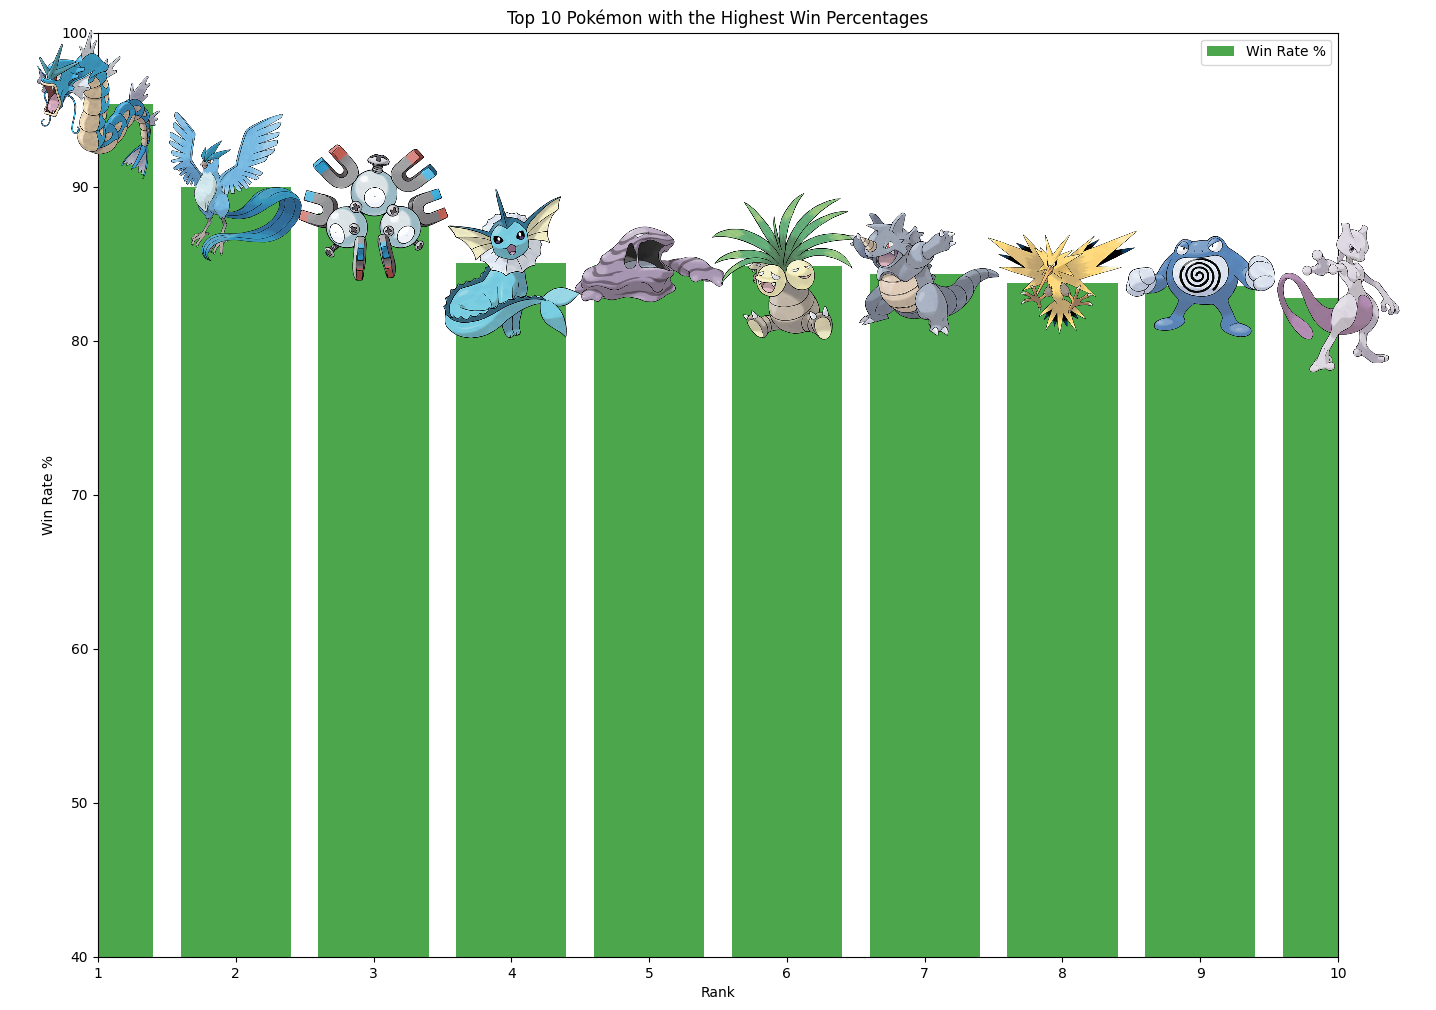

In [19]:
plt.rcParams["figure.figsize"] = [16, 12]
plt.rcParams["figure.autolayout"] = False

# Plotting the images
fig, ax = plt.subplots()

for index, row in totalresultsframe_stats_df.sort_values(by = 'rank').head(10).iterrows():
    try:
        # Retrieve image from URL
        response = requests.get(row['image_url'])
        img = Image.open(BytesIO(response.content))

        # Convert the image to a format suitable for matplotlib
        img = OffsetImage(img, zoom=0.25)  # Adjust zoom as needed

        # Add OffsetImage to the plot at position (x, y)
        ab = AnnotationBbox(img, (row['rank'], row['win_percentage']), frameon=False)
        ax.add_artist(ab)
        ax.text(row['rank'], row['win_percentage'], str(row['image_name']), ha='center', fontsize=8)

    except Exception as e:
        print(e)  

# Create a bar chart for win rate percentage
rank_values = totalresultsframe_stats_df['rank']
win_rate_values = totalresultsframe_stats_df['win_percentage']

plt.bar(rank_values, win_rate_values, color="green", alpha=0.7, label='Win Rate %')
plt.xlabel('Rank')
plt.ylabel('Win Rate %')
plt.title('Top 10 Pokémon with the Highest Win Percentages')
plt.legend()

# Set tick labels
plt.xticks(rank_values, rotation=0)  # Rotate labels for better readability

plt.xlim([1,10])
plt.ylim([40,100])

# plt.subplots_adjust(left=.001, right=.9, top=0.9, bottom=0.1)

plt.show()

'image_name'
'image_name'
'image_name'
'image_name'
'image_name'
'image_name'
'image_name'
'image_name'
'image_name'
'image_name'


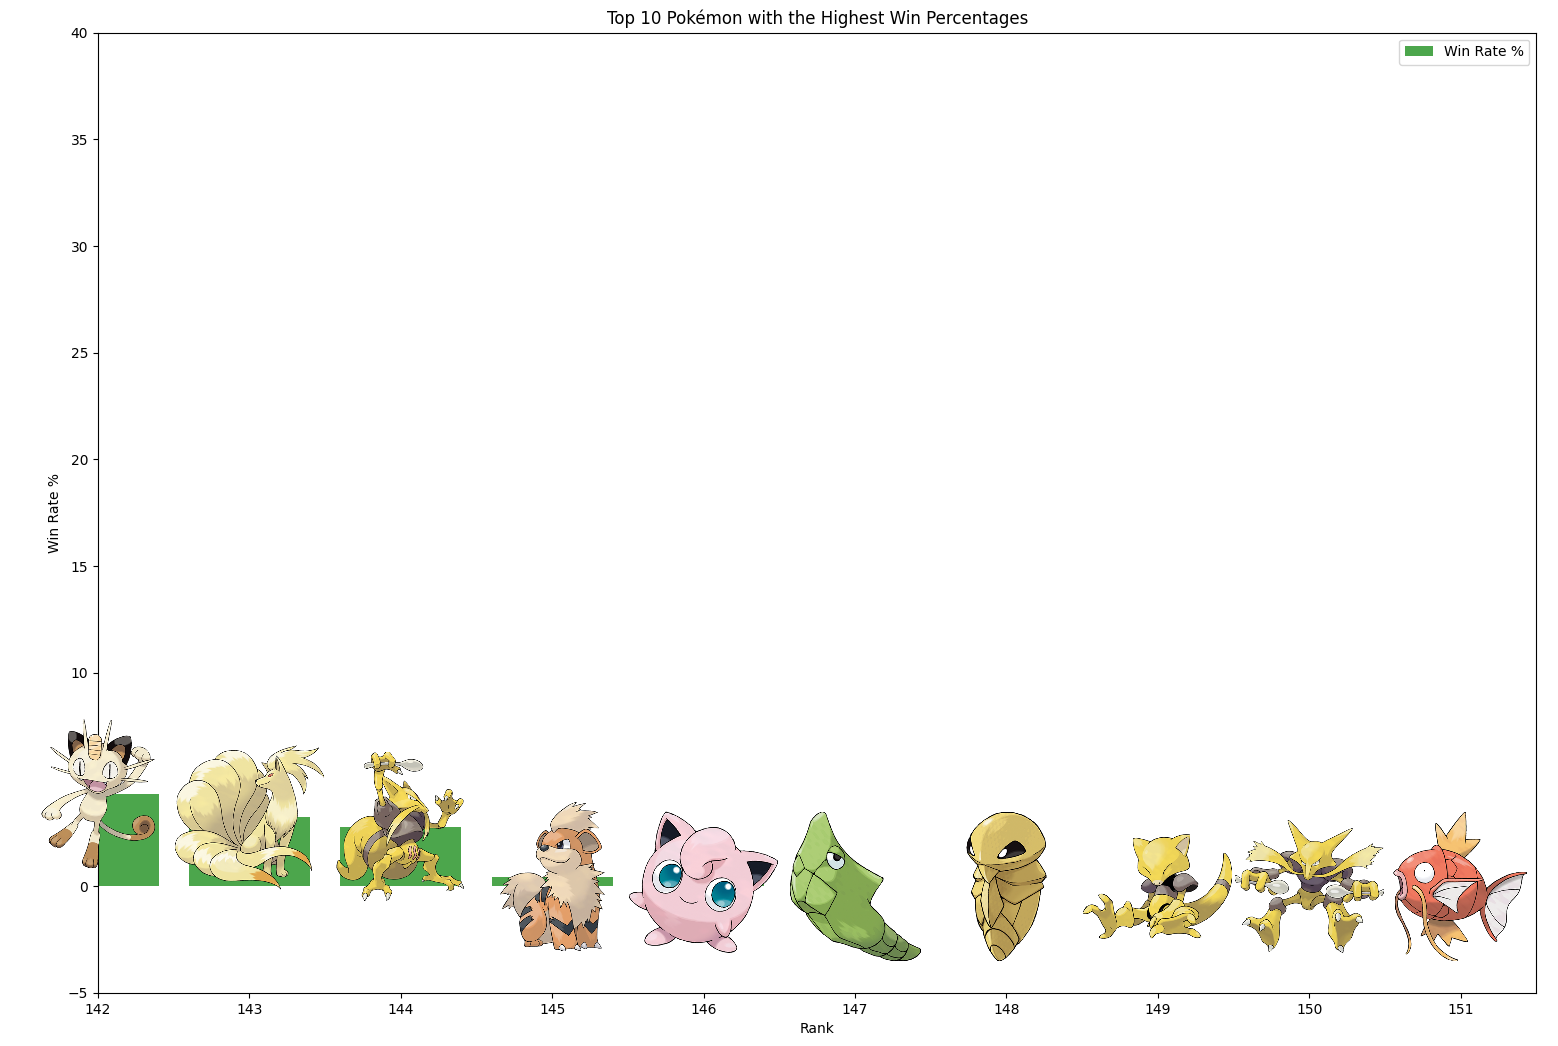

In [20]:
plt.rcParams["figure.figsize"] = [16, 12]
plt.rcParams["figure.autolayout"] = False

# Plotting the images
fig, ax = plt.subplots()

for index, row in totalresultsframe_stats_df.sort_values(by = 'rank', ascending=False).head(10).iterrows():
    try:
        # Retrieve image from URL
        response = requests.get(row['image_url'])
        img = Image.open(BytesIO(response.content))

        # Convert the image to a format suitable for matplotlib
        img = OffsetImage(img, zoom=0.25)  # Adjust zoom as needed

        # Add OffsetImage to the plot at position (x, y)
        ab = AnnotationBbox(img, (row['rank'], row['win_percentage']), frameon=False)
        ax.add_artist(ab)
        ax.text(row['rank'], row['win_percentage'], str(row['image_name']), ha='center', fontsize=8)

    except Exception as e:
        print(e)  

# Create a bar chart for win rate percentage
rank_values = totalresultsframe_stats_df['rank']
win_rate_values = totalresultsframe_stats_df['win_percentage']

plt.bar(rank_values, win_rate_values, color="green", alpha=0.7, label='Win Rate %')
plt.xlabel('Rank')
plt.ylabel('Win Rate %')
plt.title('Top 10 Pokémon with the Highest Win Percentages')
plt.legend()

# Set tick labels
plt.xticks(rank_values, rotation=0)  # Rotate labels for better readability
plt.xlim([142,151.5])
plt.ylim([-5,40])

plt.subplots_adjust(left=.001, right=.9, top=0.9, bottom=0.1)

plt.show()

In [21]:
# TOP 10 WINNERS

# Sort DataFrame by win_percentage in descending order
sorted_df = totalresultsframe_stats_df.sort_values(by='win_percentage', ascending=False)

# Extract the top 10 Pokemon with the highest win percentages
top_10_pokemon = sorted_df.head(10)

# Display information for the top 10 Pokémon
for idx, (pokemon_name, row) in enumerate(top_10_pokemon.iterrows(), 1):
    win_percentage = row['win_percentage']
    total_wins = row['total_wins']

    print(f"{idx}. Pokemon: {pokemon_name}, Win Percentage: {win_percentage:.1f}%, Total Wins: {total_wins}")

    # Get the top 5 opponents they won the most against
    top_opponents = totalresultsframe_stats_df.drop(index=pokemon_name)[pokemon_name].nlargest(5)

    print(f"   Top 5 Opponents:")
    for opponent, wins in top_opponents.items():  # Replace iteritems with items
        print(f"   - {opponent}: {wins} wins")

    print("\n" + "="*50 + "\n")

1. Pokemon: gyarados, Win Percentage: 95.4%, Total Wins: 143030
   Top 5 Opponents:
   - clefable: 301 wins
   - articuno: 301 wins
   - exeggutor: 237 wins
   - zapdos: 234 wins
   - snorlax: 105 wins


2. Pokemon: articuno, Win Percentage: 90.0%, Total Wins: 134990
   Top 5 Opponents:
   - magmar: 740 wins
   - gyarados: 699 wins
   - flareon: 606 wins
   - magneton: 587 wins
   - muk: 566 wins


3. Pokemon: magneton, Win Percentage: 88.3%, Total Wins: 132466
   Top 5 Opponents:
   - gyarados: 910 wins
   - magmar: 884 wins
   - clefable: 662 wins
   - snorlax: 632 wins
   - rhydon: 602 wins


4. Pokemon: vaporeon, Win Percentage: 85.0%, Total Wins: 127551
   Top 5 Opponents:
   - gyarados: 985 wins
   - venusaur: 974 wins
   - muk: 900 wins
   - ivysaur: 877 wins
   - weezing: 791 wins


5. Pokemon: muk, Win Percentage: 84.9%, Total Wins: 127408
   Top 5 Opponents:
   - gyarados: 997 wins
   - rhydon: 970 wins
   - magneton: 856 wins
   - snorlax: 806 wins
   - electrode: 666 wins



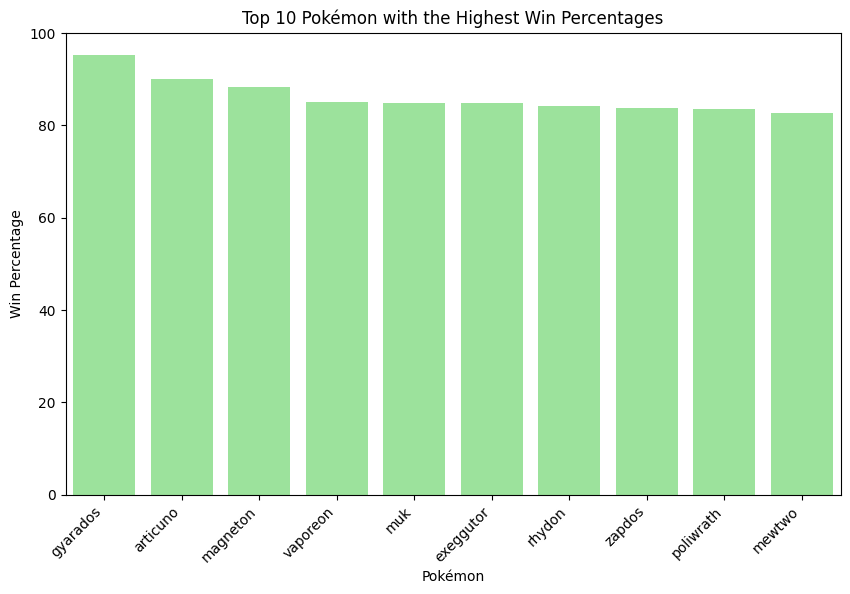

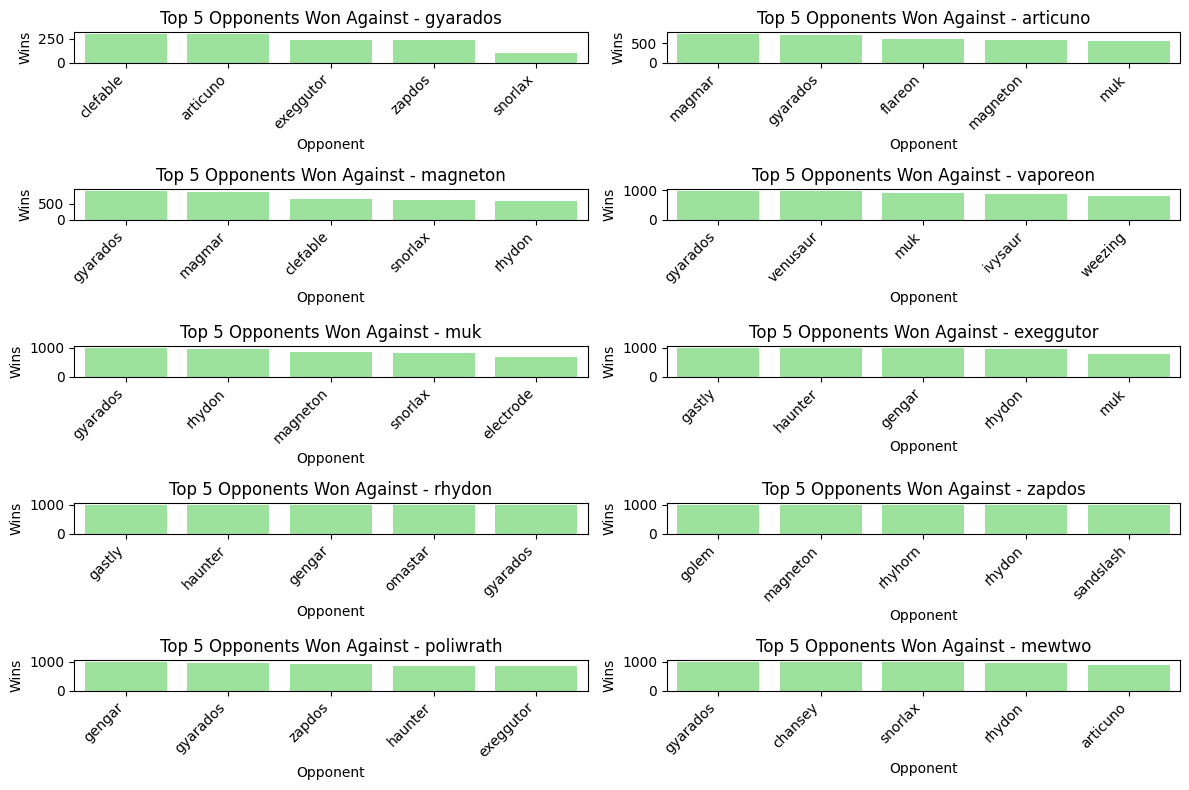

In [22]:
# Sort the DataFrame by win_percentage in descending order
sorted_df_highest = totalresultsframe_stats_df.sort_values(by='win_percentage', ascending=False)

# Extract the top 10 Pokémon with the highest win percentages
top_10_pokemon = sorted_df_highest.head(10)

# Create a bar plot for win percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_pokemon.index, y=top_10_pokemon['win_percentage'], color='lightgreen')
plt.title('Top 10 Pokémon with the Highest Win Percentages')
plt.xlabel('Pokémon')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45, ha='right')
plt.show()

# Create a bar plot for top 5 opponents they won the most against
plt.figure(figsize=(12, 8))
for idx, (pokemon_name, row) in enumerate(top_10_pokemon.iterrows(), 1):
    top_opponents_won = totalresultsframe_stats_df.drop(index=pokemon_name)[pokemon_name].nlargest(5)
    plt.subplot(5, 2, idx)
    sns.barplot(x=top_opponents_won.index, y=top_opponents_won, color='lightgreen')
    plt.title(f'Top 5 Opponents Won Against - {pokemon_name}')
    plt.xlabel('Opponent')
    plt.ylabel('Wins')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

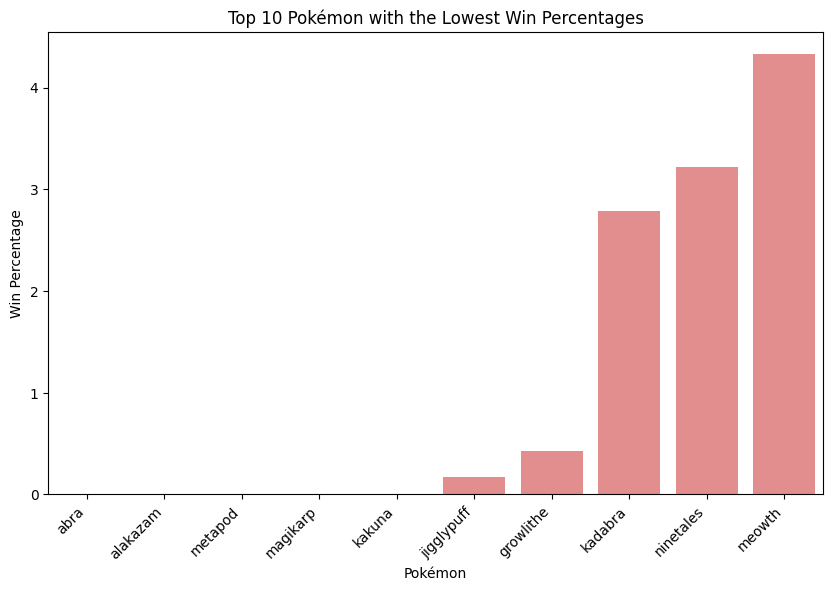

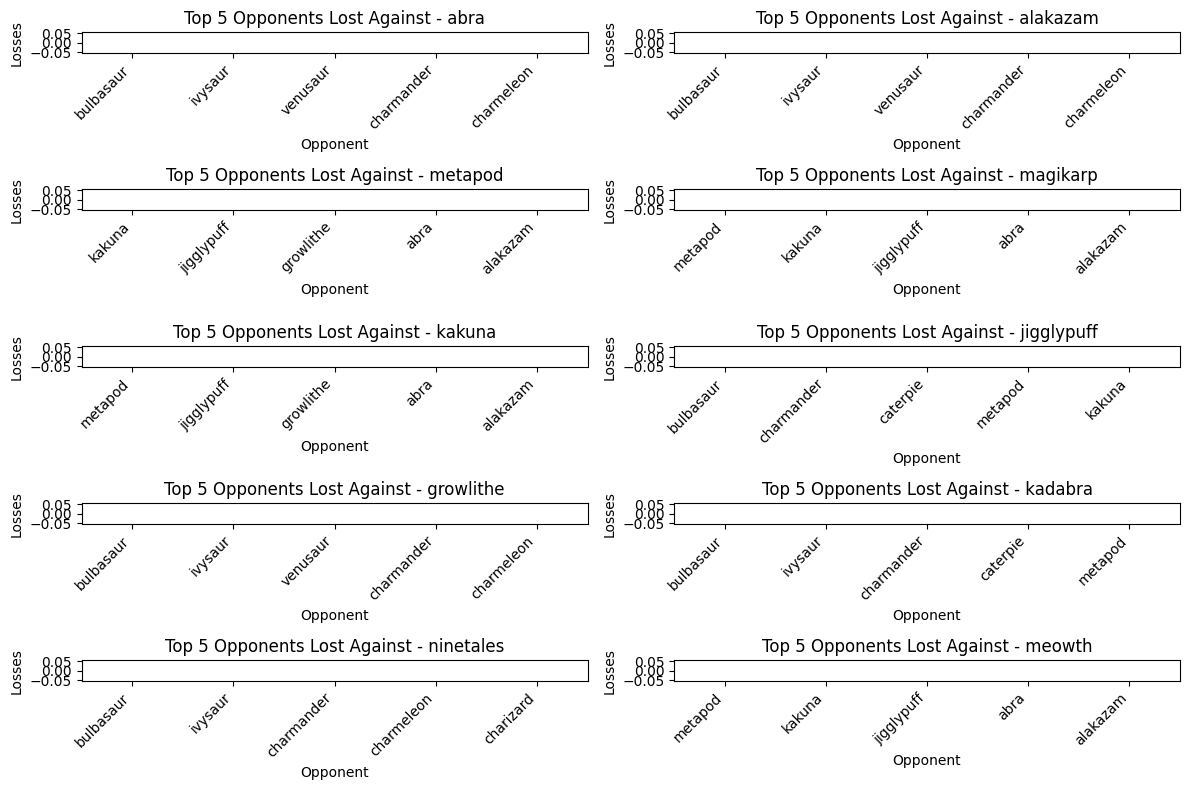

In [23]:
# Sort the DataFrame by win_percentage in ascending order
sorted_df_lowest = totalresultsframe_stats_df.sort_values(by='win_percentage', ascending=True)

# Extract the bottom 10 Pokémon with the lowest win percentages
bottom_10_pokemon = sorted_df_lowest.head(10)

# Create a bar plot for win percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_10_pokemon.index, y=bottom_10_pokemon['win_percentage'], color='lightcoral')
plt.title('Top 10 Pokémon with the Lowest Win Percentages')
plt.xlabel('Pokémon')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45, ha='right')
plt.show()

# bar plot for top 5 opponents they lost the most against
plt.figure(figsize=(12, 8))
for idx, (pokemon_name, row) in enumerate(bottom_10_pokemon.iterrows(), 1):
    top_opponents_lost = totalresultsframe_stats_df.drop(index=pokemon_name)[pokemon_name].nsmallest(5)
    plt.subplot(5, 2, idx)
    sns.barplot(x=top_opponents_lost.index, y=top_opponents_lost, color='lightcoral')
    plt.title(f'Top 5 Opponents Lost Against - {pokemon_name}')
    plt.xlabel('Opponent')
    plt.ylabel('Losses')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [24]:
# Sort the DataFrame by win_percentage in ascending order
sorted_df_lowest = totalresultsframe_stats_df.sort_values(by='win_percentage', ascending=True)

# Extract the bottom 10 Pokémon with the lowest win percentages
bottom_10_pokemon = sorted_df_lowest.head(10)

# Display information for the bottom 10 Pokémon
for idx, (pokemon_name, row) in enumerate(bottom_10_pokemon.iterrows(), 1):
    win_percentage = row['win_percentage']
    total_wins = row['total_wins']

    print(f"{idx}. Pokemon: {pokemon_name}, Win Percentage: {win_percentage:.1f}%, Total Wins: {total_wins}")

    # Get the top 5 opponents they lost the most against
    top_opponents_lost = totalresultsframe_stats_df.drop(index=pokemon_name)[pokemon_name].nsmallest(5)

    print(f"   Top 5 Opponents Lost Against:")
    for opponent, losses in top_opponents_lost.items():
        print(f"   - {opponent}: {losses} losses")

    print("\n" + "="*50 + "\n")

1. Pokemon: abra, Win Percentage: 0.0%, Total Wins: 0
   Top 5 Opponents Lost Against:
   - bulbasaur: 0 losses
   - ivysaur: 0 losses
   - venusaur: 0 losses
   - charmander: 0 losses
   - charmeleon: 0 losses


2. Pokemon: alakazam, Win Percentage: 0.0%, Total Wins: 0
   Top 5 Opponents Lost Against:
   - bulbasaur: 0 losses
   - ivysaur: 0 losses
   - venusaur: 0 losses
   - charmander: 0 losses
   - charmeleon: 0 losses


3. Pokemon: metapod, Win Percentage: 0.0%, Total Wins: 0
   Top 5 Opponents Lost Against:
   - kakuna: 0 losses
   - jigglypuff: 0 losses
   - growlithe: 0 losses
   - abra: 0 losses
   - alakazam: 0 losses


4. Pokemon: magikarp, Win Percentage: 0.0%, Total Wins: 0
   Top 5 Opponents Lost Against:
   - metapod: 0 losses
   - kakuna: 0 losses
   - jigglypuff: 0 losses
   - abra: 0 losses
   - alakazam: 0 losses


5. Pokemon: kakuna, Win Percentage: 0.0%, Total Wins: 0
   Top 5 Opponents Lost Against:
   - metapod: 0 losses
   - jigglypuff: 0 losses
   - growlithe: